# Competition #1: Final Report

## Research Question
   *What are the determinants of IPO underpricing phenomena?*
   
## Business Understanding
When presented with this business question, our first task was to better understand the problem at hand. We started by researching the IPO underpricing phenomena to familiarize ourselves with the business question and standard IPO terminology. Underpricing occurs when the price of an initial public offering (IPO) is lower than the price of the first trade. Many believe that underpriced IPOs leave money on the table for corporations, but some believe that underpricing is inevitable. An Initial Public Offering (IPO) is a critical moment for a company. A firm going public relies on the capital raised in its IPO to grow and thrive. The stakes also are high for other parties. Investors can reap huge profits or sustain big losses. For the firm’s owners and managers, as well as the venture capitalists with a stake in the firm and the investment bankers who underwrite the sale, careers and fortunes can be made. It is in the interest of investment banks to underprice an IPO because it nurtures ties to institutional investors, who are often repeat customers of the banks and who benefit directly from the underpricing. 
   
In a recently published paper, Hoskisson and his co-authors, Jonathan D. Arthurs of Washington State University, Lowell W. Busenitz of the University of Oklahoma, and Richard A. Johnson of the University of Missouri, use agency theory to craft a series of hypotheses about the behavior of the players in an IPO. The hypotheses focus on the boards of directors of companies, which are made up of insiders and outsiders, many of whom have different motivations, according to the authors. The researchers challenged the widely held notion that having outsiders on a board is good for a company that is going public. Since the Enron debacle and similar scandals, regulators and legislators have put in place measures requiring more outsiders on boards. Outsider staffing or outsider majorities now are required on auditing committees and other key committees of publicly traded firms.[1]

But in an IPO, outsiders actually are the ones looking for short-term gains, and the insiders, or managers of a firm, are the players with the long-term vision a young and growing company needs, the researchers believe. The institutional investors usually will cash out in a matter of days, and the venture capitalists typically have exited the company within six months on average. On the other hand, the managers will be with the company long after the IPO, and they have an interest in seeing the venture succeed in the long run, according to the authors.[1]

However, all this background information into the underpricing phenomena does not answer the research question of can it be predicted? According to Hoskisson “Fifteen percent of all these ventures is a lot of money on the table. It’s all going to institutional investors who usually flip the shares in the first couple of days”. Being able to predict when an underpricing of an IPO will occur has the potential to benefit both parties. Venture capitalists, investment banks will be able to predict if and when a new IPO will result in underpricing and thus be able to make money on the stocks going up, whereas the companies themselves will be able to take defensive action if they beleive they will fall victim to this phenomena.

In this next section we look at how we recoded the *I3* column. This lead to the creation of an updated dataset as we had to manually edit the *I3* column to resolve errors in the data.

### Recoding

As we will see later, there were over 180 unique Standard Industry Classification codes in the *I3* column, which is a significant amount. It was decided to do some research in an attempt to find a method to aggregate codes together in order to create a more manageable number. While conducting research, we realized that the *I3* column was not populated and/or was incorrect for about 60 instances. We came to this realization that some instances were incorrect when attempting to link the Industry names found on the SEC website to the provided SIC codes. There were a total of 61 records that needed to be manually updated. We updated these codes by searching for the companies in the following search section of the U.S. Securities and Exchange Commission website:
https://www.sec.gov/edgar/searchedgar/companysearch.html

The records that required updating along with the original and updated I3 values can be found in the below excel file:

[Updated I3 Records Table](https://github.com/ConorFeeney/IS540-Code/blob/master/I3%20Updates.xlsx)

After correcting these instances, we were able to match to an Industry Division based on the codes. This allowed us to recode the *I3* column to a categorical variable of industry divisions. 


| Range of SIC Codes | Division                                                           |
|--------------------|--------------------------------------------------------------------|
| 0100-0999          | Agriculture, Forestry and Fishing                                  |
| 1000-1499          | Mining                                                             |
| 1500-1799          | Construction                                                       |
| 1800-1999          | Not Used                                                           |
| 2000-3999          | Manufacturing                                                      |
| 4000-4999          | Transportation, Communications, Electric, Gas and Sanitary service |
| 5000-5199          | Wholesale Trade                                                    |
| 5200-5999          | Retail Trade                                                       |
| 6000-6799          | Finance, Insurance and Real Estate                                 |
| 7000-8999          | Services                                                           |
| 9100-9729          | Public Administration                                              |
| 9900-9999          | Non Classifiable                                                   |


We were hoping to use these divisions as a way of clustering the records prior to modeling, to hopefully improve the model fit. Unfortunately, due to the restriction in number of clusters allowed for linear regression models (maximum of 5), we could not stop at this level of categories (12). Thankfully, viewing this summarzied version of divisions gave us additional ideas to how we could aggregate the provided cuts to 5 or less breaks. 

#### Industry Divisions (12 breaks, as provided on the SEC website)
Below are the various methods of recoding we attempted for the *I3* column to test within our model:
* Manufacturing vs. "Other" (2 breaks, viewing the "Manufacturing" division as one break and bucketing the remaining divisions into an "other" bin.
* Technology vs. Non-Tech (2 breaks, viewing Technology companies in one break and bucketing the remaining divisions into an "other" bin).
* Manufacturing, Services, and "Other" (3 breaks, viewing the "Manufacturing" division as one break, combining Services division and Transportation,Communications, Electric, Gas and Sanitary Service Division into another break, and then bucketing the remaining divisions into an "other" bin). **This is the one we selected**
* Manufacturing, Services, Trade, and "Other" (4 breaks, viewing the "Manufacturing" division as one break, combining Services division and Transportation,Communications, Electric, Gas and Sanitary Service Division into another break, combining Retail Trade and Wholesale Trade in another break, and then bucketing the remaining divisions into an "other" bin.
* Manufacturing, Services, TCEGS, Trade, and "Other" (5 breaks, viewing the "Manufacturing" division as one break, Services division as a second break, Transportation,Communications, Electric, Gas and Sanitary Service Division into a third break, combining Retail Trade and Wholesale Trade into a fourth break, and then bucketing the remaining divisions into an "other" bin).
* Labor vs. Non-Labor (2 breaks, viewing all divisions that are in the manual labor category as one break, and all other divisions in another break.)

We created an external function to calculate each of these various methods of recoding for us, which can be found in the link below.

[Recoding SIC Column Function](https://github.com/ConorFeeney/IS540-Code/blob/master/Recoding_SIC_Codes.py) 

This lead to a new UPDATED dataset that was used for the analysis.

## Data Understanding   
   Our next step was to study the data dictionary provided. What variables were we provided with to predict the determinants of underpricing? The dataset provided had 682 records, and 22 attributes. Variable data types included Continuous/Float, Binary/Boolean, and Text. We aimed to get a better understanding of the types of variables provided along with their definitions, not only to help us determine whether instances in our dataset seemed incorrect, but also so that we may come up with hypotheses of which variables we thought may make the best predictors. Once we gained a better idea of the data that was provided via the data dictionary and general research, we moved on to inspecting the actual dataset. We started this task by reading the data into python, previewing the loaded dataframe, inspecting the datatypes each variable mapped to, running descriptive statistics on the dataset, and finally creating histograms for each variable. **All of this was done using the new dataset we created in the previous section**

In [1]:
# Importing useful packages
import numpy as np
from scipy import stats
import pandas as pd
import sklearn as sk
import seaborn as sb
import datetime as dt
import pylab 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from new_var import calc,y1function,y2function,C3function,C6function
from outliers import outlier
from Standardising import standard
from Recoding_SIC_Codes import Industry_Division
%matplotlib inline
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support


# Read in Data file and define NaN values
ipo_data = pd.read_excel("Competition #1 Raw Data_UPDATED I3.xlsx",header=0,na_values='-' )



ipo_data.I3 = ipo_data.I3.astype(int) # recoding to correct type

# applying our function to recode our industry codes to sector level
ipo_data['IndDivision'] = ipo_data.apply(Industry_Division, method=4, axis=1) 

# Adding Dummy Variables 
dummies = pd.get_dummies(ipo_data['IndDivision'])
ipo_data = ipo_data.join(dummies)
ipo_data.I3 = ipo_data.I3.astype(str) # recoding type for convenience 


# Run Descriptive Statistics on Data File
print(ipo_data.dtypes)


C:\Users\conor\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\conor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


I1                object
I2                object
I3                object
P(IPO)           float64
P(H)             float64
P(L)             float64
P(1Day)          float64
C1               float64
C2               float64
C3               float64
C4               float64
C5               float64
C6               float64
C7               float64
T1               float64
T2               float64
T3               float64
T4               float64
T5               float64
S1               float64
S2               float64
S3               float64
IndDivision       object
Manufacturing      uint8
Other              uint8
Services           uint8
dtype: object


One extremely important point the authors of this report wish to make is that there is a mistake in the data dictionary. The variable *I3* is coded as text in the dictionary when it is fact an integer variable representing industry codes for the companies. The reason for this is that some company's codes have been erroneously entered in the data set, possessing multiple codes with commas separating the codes. There are two mistakes here, the first being have multiple codes and the second using commas to separate as this is converting the field to a text or object field. One member of our team painstakingly went through the missing and incorrect codes and corrected them in the raw data file. This allowed us to read in *I3* correctly as an int variable. We converted to an object for this next section as it is a categorical variable an it does not possess summary statistics. When using the re coding script above, it was decided to break down the I3 codes into three divisions. Manufacturing, Services and Other. 

In [2]:
# Printing summary statistics
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T2,T3,T4,T5,S1,S2,S3,Manufacturing,Other,Services
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,...,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,682.000000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,...,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178,0.451613,0.158358,0.390029
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,...,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285,0.498018,0.365344,0.488115
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000,0.000000,0.000000,0.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,...,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000,0.000000,0.000000,0.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,...,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000,0.000000,0.000000,0.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,...,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000,1.000000,0.000000,1.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,...,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000,1.000000,1.000000,1.000000


The resulting table above led us to several immediate takeaways:
* Variables *T2* to *T5* have incorrect minimums. We know this to be true due to examining the data. Upon inspection it became clear that, as an example, *T2*, which is Number of Words in MD&A section of a company's IPO prospectus cannot be 0, especially when we look at these particular cases *T3* - *T5* variables and see numbers greater than 0. Additionally it is also impossible for these variables to have a negative word count. Based on this evidence, it was decided to treat values of this nature as "Missing"
* *P(H)*, was displaying a minimum of 0. Given that this is the upper bound of the IPO price range, this value must be incorrect
* There may be instances where *P(L)* is higher than *P(H)*, which would be incorrect, as the upper bound of the price range could not be lower than the lower bound of the range
* Many attributes had maximum values that seemed dramatically high given the mean and interquartile range provided such as *C3* and *C7* 
* *C6* has some unusually high values
* As the purpose of this study is to predict the underpricing phenonium, it is important to note that the mean value of *P(IPO)* is less than the mean value of *P(1Day)*
* The max of the S1 filings variable (*C1*) is for over five years in the future. Considering companies typically can get this completed within six months, this was viewed as an error
* Our target and control variables would need to be created

These immediate takeaways gave us a better foundation of where our data stood, and gave us ideas of where to next investigate anomalies and outliers within each attribute and record.

Next we look at the frequncy breakdown of our industry indicators in the variable *I3*:

In [3]:
# Returns the frequency
ipo_data.I3.value_counts()

2834    76
7372    49
3674    36
7389    35
3841    30
1311    18
7374    14
3845    14
7373    13
5812    11
2836    10
4412    10
4899    10
7371    10
8731     9
5600     8
8200     7
4813     7
3663     7
2860     7
3661     6
7370     6
8742     6
7359     6
3577     5
3842     5
4213     5
3825     5
7011     5
1389     5
        ..
3670     1
2750     1
5500     1
4922     1
2673     1
4011     1
2741     1
4832     1
7361     1
2090     1
6331     1
7384     1
5150     1
3578     1
1531     1
2711     1
6798     1
5080     1
7510     1
8060     1
5531     1
3442     1
3440     1
3562     1
5065     1
5047     1
5160     1
3334     1
5900     1
3721     1
Name: I3, Length: 184, dtype: int64

As we can see, the code 2834 has the largest frequncy of 76. Another key feature to note is the length, we have a 184 unique values. This will require some recoding later along with some research in to the codes in order to determine which range of codes correspond to which sectors in order to reduce the number of categories. This is discussed in the Recoding SIC Codes section of this report.

Next we examine hthe missingness of our data. We know that their is 682 records in our data, so using this value we can calulate the percentage of missing data for each variable.

In [4]:
# Generating a print statement to highlight the issing of our data
for i in range(len(ipo_data.columns)):
    j = ipo_data.columns[i]
    miss=((682-ipo_data[str(j)].count())/682)*100
    print("The missingness of variable {}".format(j))
    print("{0:.2f}%".format(miss))

The missingness of variable I1
0.00%
The missingness of variable I2
0.00%
The missingness of variable I3
0.00%
The missingness of variable P(IPO)
0.73%
The missingness of variable P(H)
1.47%
The missingness of variable P(L)
1.47%
The missingness of variable P(1Day)
3.23%
The missingness of variable C1
3.23%
The missingness of variable C2
3.23%
The missingness of variable C3
5.28%
The missingness of variable C4
3.23%
The missingness of variable C5
0.88%
The missingness of variable C6
0.88%
The missingness of variable C7
10.56%
The missingness of variable T1
0.15%
The missingness of variable T2
0.15%
The missingness of variable T3
0.15%
The missingness of variable T4
0.15%
The missingness of variable T5
0.15%
The missingness of variable S1
0.15%
The missingness of variable S2
0.15%
The missingness of variable S3
0.15%
The missingness of variable IndDivision
0.00%
The missingness of variable Manufacturing
0.00%
The missingness of variable Other
0.00%
The missingness of variable Services
0

As we can see, the column with the largest amount of missing data is *C7* or the Sales field with 10.56%. The columns related to sentences and word counts appear quite small, but as we know, there are unnoticed missing values as 0 and -1 should be classified as missing but are in fact counted in this case.

Before we begin preparing our data for modelling but before that we look at the shapes of our distributions for our continuous variables. It is important to note we drop the NaN values for these plots to be generated as the Python histogram function does not deal with missing data well. Later in this report, we will see how we actually dealt with the missing data.

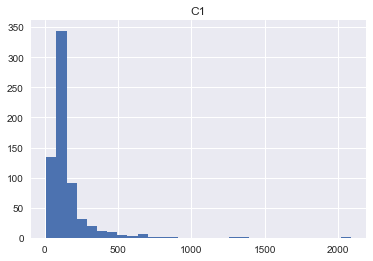

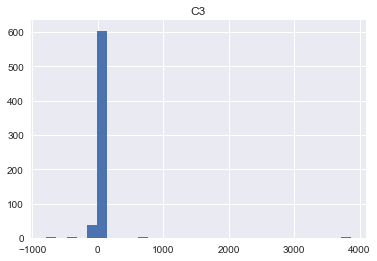

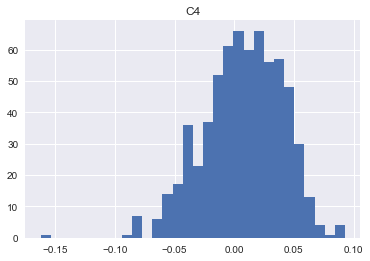

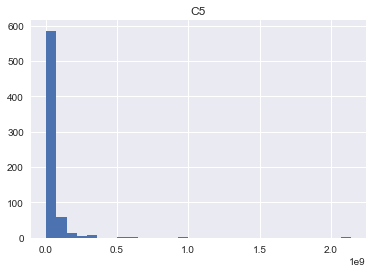

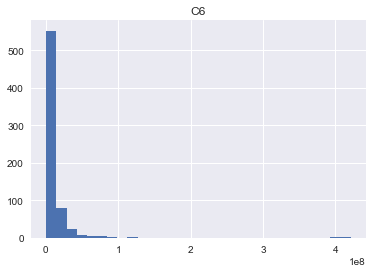

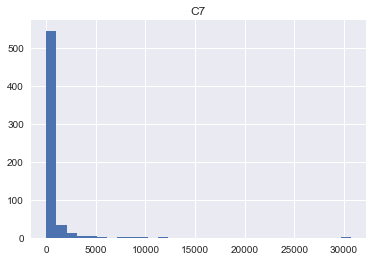

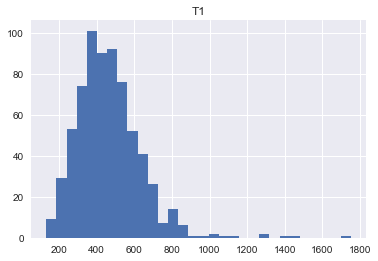

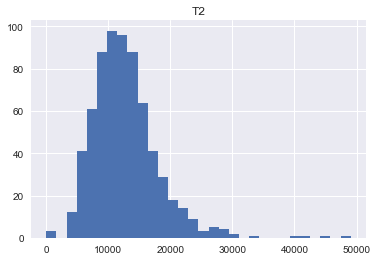

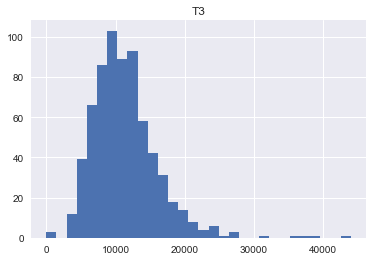

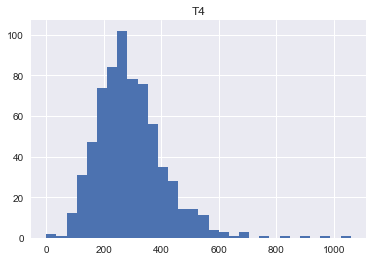

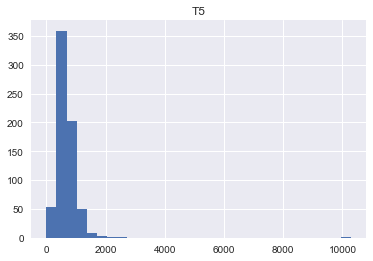

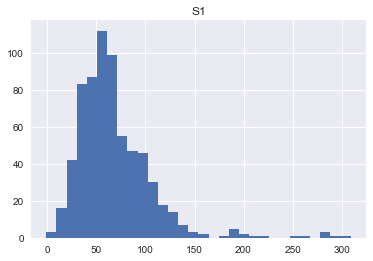

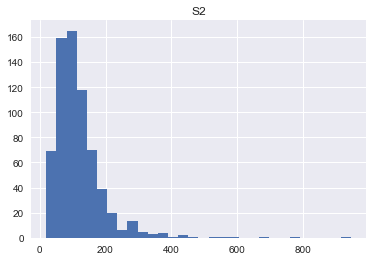

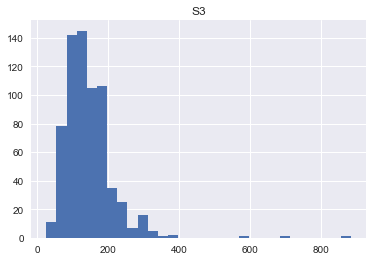

In [5]:
cont_var=['C1','C3','C4','C5','C6','C7','T1','T2','T3','T4','T5','S1','S2','S3'] #Variables that need to be normalized
cont_plot=ipo_data[cont_var]

# plotting our variables
for i in range(len(cont_plot.columns)):
        plt.hist(cont_plot.iloc[:,i].dropna(),bins=30)
       
        plt.title('%s' % cont_plot.columns[i])
       
        plt.show()

As we can see, much of our data is heavily skewed. This is due in part to the presence of outliers and extreme values that exist in our data set. For example, look at the histogram for the variable *T5*, and notice the outlier at the 10000 mark which is some considerable distance away from the rest of our distribution but nonetheless, is a part of the distribution and thus creates the skewness in our data. The data that is the least skewed is *C4*, but a slight left skew still exists.

In the next section we move onto data preperation. This involves imputing missing data, dealing with outliers, normalising our data and other such tasks that are all completed to increase the accuracy of our logistic regression models.

## Data Preperation 
Once we gained a better understanding of our data, we were able to move forward with preparing the data based on our findings. We decided to utlize multiple methods in each of the suggested tasks provided, as well as some others.

### Imputation
When replacing missing values, our methods depended on the data type of the specific variable in question. For descriptive attributes like *I3*, we conducted research to find the correct identification numbers and then manually updated our dataset. For Continuous/Float variables, we used a python script to replace the missing variables with their respective means, as this is a dependable procedure when dealing with missing values. For the purposes of this report, we arbitrarily choose the mean for our benchmark model, but replacing with the median is an equally acceptable method.

Additionally, negative and zero values in the columns listed below are removed as these are believed to be errors in the data. We feel justified in this as researching the forms, it is our understanding that these are mandatory sections to be completed, confirming our belief that these are errors. Removing negatives was done because it is impossible to have a negative word total, thus we believe it is either there in error or to represent missing. As the variable *C2* is a binary variable, it was decided to replace the missing values with "1" as it is far more common value than 0 based on the summary statistics (mode replacement).

In [6]:
# Replacing NaN in C2 with 1 
ipo_data['C2']=ipo_data['C2'].fillna(1)


# Removing negative and 0 values for the word/sentence counts as it is beleived that these are errors
# Removing 0 and negatives for T' calculations        
ipo_data['T2']=ipo_data['T2'].mask(ipo_data['T2'] <= 0,ipo_data['T2'].mean())
ipo_data['T1']=ipo_data['T1'].mask(ipo_data['T1'] <= 0,ipo_data['T1'].mean())
ipo_data['T3']=ipo_data['T3'].mask(ipo_data['T3'] <= 0,ipo_data['T3'].mean())
ipo_data['T4']=ipo_data['T4'].mask(ipo_data['T4'] <= 0,ipo_data['T4'].mean())
ipo_data['T5']=ipo_data['T5'].mask(ipo_data['T5'] <= 0,ipo_data['T5'].mean())
ipo_data['S1']=ipo_data['S1'].mask(ipo_data['S1'] <= 0,ipo_data['S1'].mean())
ipo_data['C3']=ipo_data['C3'].mask(ipo_data['C3'] == 0,ipo_data['C3'].mean())
# Replace NaN values with mean
ipo_data=ipo_data.fillna(ipo_data.mean())

ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T2,T3,T4,T5,S1,S2,S3,Manufacturing,Other,Services
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.863636,1.802750,0.007282,4.935776e+07,1.241519e+07,...,12796.076671,11446.046304,295.218367,680.219119,68.523379,120.104258,144.759178,0.451613,0.158358,0.390029
std,6.031467,6.604398,5.792641,72.042293,150.328785,0.343426,158.308525,0.032775,1.039156e+08,2.501761e+07,...,5401.439089,4776.337443,120.388056,471.846487,38.977000,84.766654,69.225403,0.498018,0.365344,0.488115
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,...,527.000000,3003.000000,70.000000,167.000000,5.000000,20.000000,26.000000,0.000000,0.000000,0.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,1.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,...,9213.250000,8238.500000,214.000000,463.250000,45.000000,73.000000,100.000000,0.000000,0.000000,0.000000
50%,13.500000,15.481190,13.000000,15.000000,110.000000,1.000000,0.085000,0.007282,2.759165e+07,7.500000e+06,...,12064.000000,10811.000000,280.000000,625.500000,60.000000,100.500000,134.000000,0.000000,0.000000,0.000000
75%,17.000000,17.000000,15.000000,21.030001,152.750000,1.000000,0.620000,0.030941,4.938184e+07,1.208721e+07,...,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.750000,173.000000,1.000000,0.000000,1.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,...,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000,1.000000,1.000000,1.000000


### Variable Creation
Based on the provided data dictionary, we created two target variables, and three control Variables:
#### Target
 1. Y1 - Binary variable, set to 1 if the IPO offer price is less than the mid range of the IPO price
 2. Y2 - Binary variables, set to 1 if the IPO offer price is less than the first day trading price
 
#### Control
 1. C3x - Binary variable, set to 1 if Earnings per Share is positive
 2. C5x - Continuous/Float variable, representing the share overhang
 3. C6x - Continuous/Float variable, representing the up revision
 
Additionally, we also converted all our count variables in *T1*-*T5* and *S1*-*S3* into ratios for better statisitic analysis.

It was also decided to generate some new variables that we thought would be useful for further calculations.
1. Income: This is the gross income gathered from the IPO for the company. This is calculated by muliplying the offering shares by the IPO price
2. perOffered: This is the percentage of the company that is offered for public trading. This is calculated by dividing the offering shares by the outstanding shares
3. P/E: This is the Price/Earnings ratio. We added 1150 (which is the minimum value) in order to shift the distribution for normalisation later on. 
 
 [New Variable Creation](https://github.com/ConorFeeney/IS540-Code/blob/master/new_var.py) 

In [7]:
# Creating our target and control variables
ipo_data['Y1'] = ipo_data.apply(y1function, axis=1)
ipo_data['Y2'] = ipo_data.apply(y2function, axis=1)
ipo_data['C3x'] = ipo_data.apply(C3function, axis=1)
ipo_data['C6x'] = ipo_data.apply(C6function, axis=1)

#Creating ratios for the words, sentences and postive/negative counts. Ratios provide insight
calc(ipo_data)

# Creating New information variables
ipo_data['income']=ipo_data['P(IPO)']*ipo_data['C6']
ipo_data['perOffered']=ipo_data['C6']/ipo_data['C5']
ipo_data['P/E']=ipo_data['P(IPO)']/ipo_data['C3']
#Shifting the distribution
ipo_data['P/E']=ipo_data['P/E']+1150
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,C5x,T3x,T4x,T5x,S1x,S2x,S3x,income,perOffered,P/E
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.863636,1.802750,0.007282,4.935776e+07,1.241519e+07,...,4.627711,0.918942,0.629876,0.080692,0.005504,0.009179,0.011854,2.265801e+08,0.304365,1159.904779
std,6.031467,6.604398,5.792641,72.042293,150.328785,0.343426,158.308525,0.032775,1.039156e+08,2.501761e+07,...,6.245584,0.624282,0.076265,0.744766,0.004784,0.004324,0.008970,9.485423e+08,0.221202,157.354155
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,...,0.283223,0.703925,0.395480,0.031595,0.001389,0.002152,0.005125,1.706250e+06,0.010021,0.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,1.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,...,2.853439,0.883578,0.580815,0.047413,0.004154,0.007031,0.009570,5.810000e+07,0.205547,1139.437996
50%,13.500000,15.481190,13.000000,15.000000,110.000000,1.000000,0.085000,0.007282,2.759165e+07,7.500000e+06,...,3.770051,0.897133,0.629077,0.051901,0.005069,0.008600,0.011305,9.775000e+07,0.265248,1152.913835
75%,17.000000,17.000000,15.000000,21.030001,152.750000,1.000000,0.620000,0.030941,4.938184e+07,1.208721e+07,...,4.865080,0.909732,0.674852,0.056471,0.006258,0.010535,0.012883,1.734750e+08,0.350455,1177.990302
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,...,99.787255,17.165085,1.443089,19.500949,0.121442,0.091082,0.233397,1.786400e+10,3.530786,2950.000000


As we created several new variables, for example, we create *T3x* which is the ratio of Real Words to Total Words, we felt justified in removing the variable *T3* from our data set as it would be covered in all future analysis by *T3x*. This was done to keep our data frame tidy. This logic was also applied for *T4* (now *T4x*, ratio of long sentences to total sentences), *T5* (now *T5x*, ratio of long words to total words), *S1* (now *S1x*, ratio of positive words to total words), *S2* (now *S2x*, ratio of negative words to total words) and *S3* (now *S3x*, ratio of uncertain words to total words). 

As we read in our data, some variables were not read correctly in terms of types so we changed their type to be more appropriate and then printed the types of all our variables in order to ensure we were happy with them.

In [8]:
# Converting C6x and C2 to correct type
ipo_data.C6x = ipo_data.C6x.astype(float)

ipo_data.C2 = ipo_data.C2.astype(int)
print(ipo_data.dtypes) # checking the types

I1                object
I2                object
I3                object
P(IPO)           float64
P(H)             float64
P(L)             float64
P(1Day)          float64
C1               float64
C2                 int32
C3               float64
C4               float64
C5               float64
C6               float64
C7               float64
T1               float64
T2               float64
T3               float64
T4               float64
T5               float64
S1               float64
S2               float64
S3               float64
IndDivision       object
Manufacturing      uint8
Other              uint8
Services           uint8
Y1                 int64
Y2                 int64
C3x                int64
C6x              float64
C5x              float64
T3x              float64
T4x              float64
T5x              float64
S1x              float64
S2x              float64
S3x              float64
income           float64
perOffered       float64
P/E              float64


### Normalization

Most statistical methods (the parametric methods) include the assumption that the sample is drawn from a population where the values have a Normal distribution. One of the first steps of statistical analysis of your data is therefore to check the distribution of the different variables.

Upon completing the task of daeling with missing values and errors in the data, it was decided to move on to normalizing our data, followed by dealing with outliers and finally standardising our data.

The Normal distribution is symmetrical, not very peaked or very flat-topped, and if we exam the charts below we can see that our data is often skewed. 


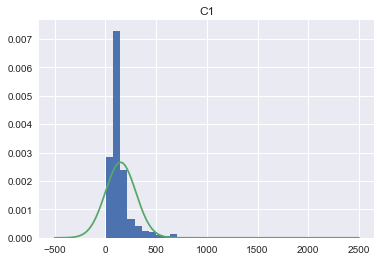

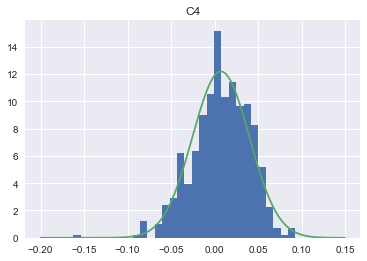

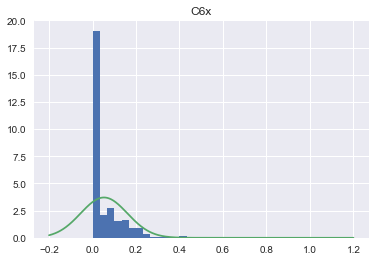

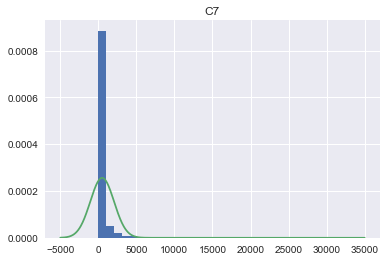

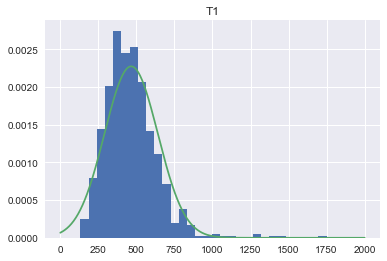

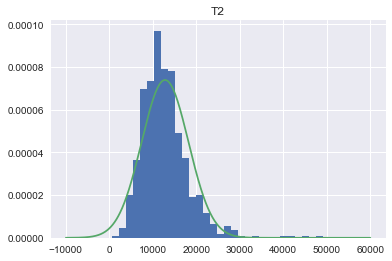

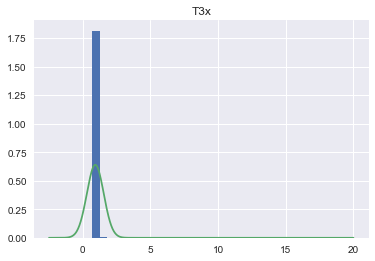

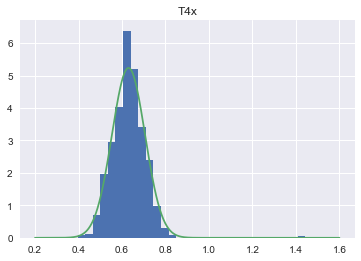

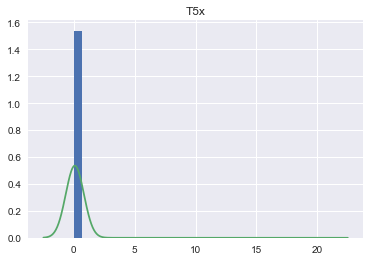

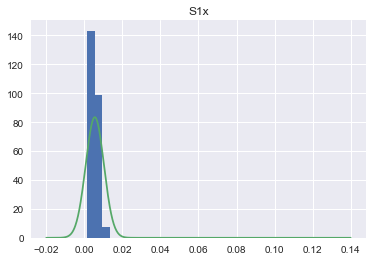

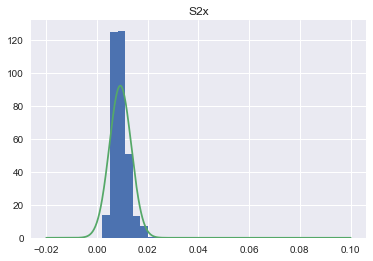

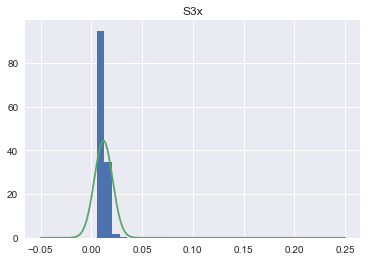

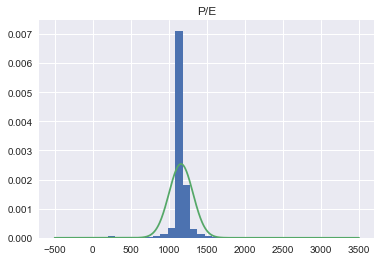

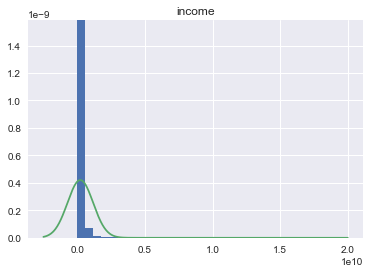

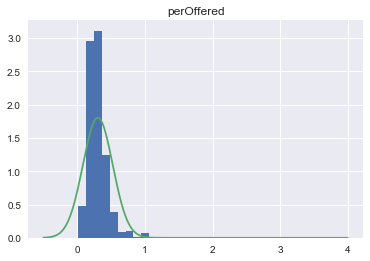

In [9]:
normal_var=['C1','C4','C6x','C7','T1','T2','T3x','T4x','T5x','S1x','S2x','S3x','P/E','income','perOffered'] #Variables that need to be normalized
norm_plot=ipo_data[normal_var]
for i in range(len(norm_plot.columns)):
        plt.hist(norm_plot.iloc[:,i],bins=30,normed=True)
        xt = plt.xticks()[0]  
        xmin, xmax = min(xt), max(xt)  
        lnspc = np.linspace(xmin, xmax, len(norm_plot.iloc[:,i]))
        plt.title('%s' % norm_plot.columns[i])
        # lets try the normal distribution first
        m, s = stats.norm.fit(norm_plot.iloc[:,i]) # get mean and standard deviation  
        pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
        plt.plot(lnspc, pdf_g, label="Norm")
        plt.show()

Examining the charts we can note several points of interest. *C1*, *C6x*, *C7*, *T3x*, *T5x*, *S1x*-*S3x*,*income*, *perOffered* are all heavily skewed to the right. This is more than likely caused by the presence of extreme values and outliers, which we will be dealing with in the next section. *T4x*,*T2* and *T1* is also right skewed, but far less so. The variable *C4* is left skewed. For the purposes of our model we will be dealing with this skewness using some powerful, but simple methods.

For dealing with skew, the following transformations perform well:
 * The **log** transformation (sometimes computed **log**(x+A) where A is some constant. This is done to deal with negative or 0 values.
 * The **Square Root** function
 * Converting to a **Fraction**, i.e. **1/x**
 * The **Powers** transformation

We can also use some combination thereof. For our base model, it was decided to keep things simple initially with a goal to revisit this section in the future after normal transformations have been built into our loop for the selection of the Logistic Regression model.

For right skewed data, the **log** transformation works well, and this was the selected transformation for our benchmark model for the severly right skewed data listed above. For C4 and T4x, it is suspected that if the outliers were dealt with, the data would become more normally distributed. As this is our benchmark, this was the decided approach with a view of returning to this as we seek to improve the model.

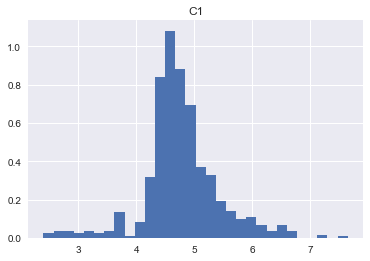

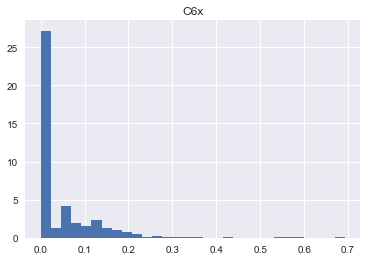

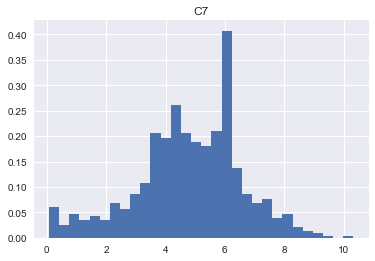

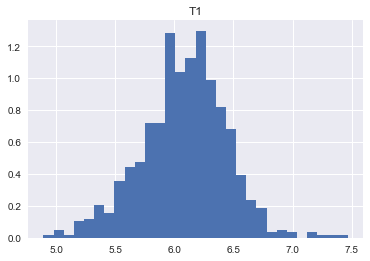

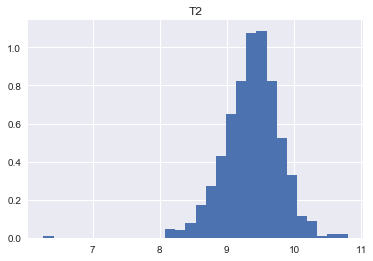

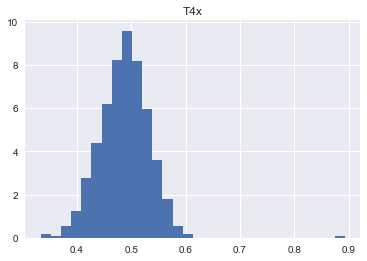

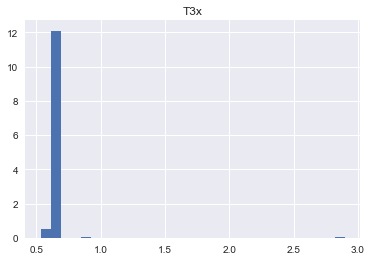

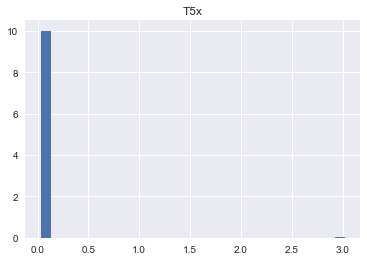

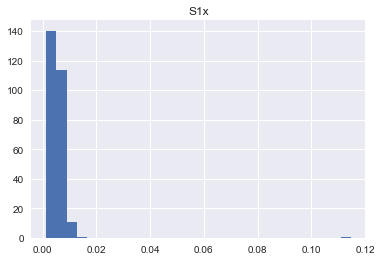

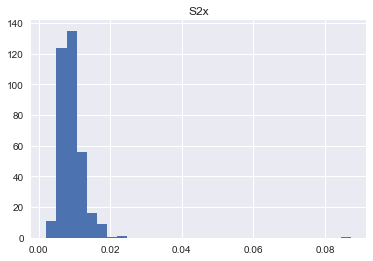

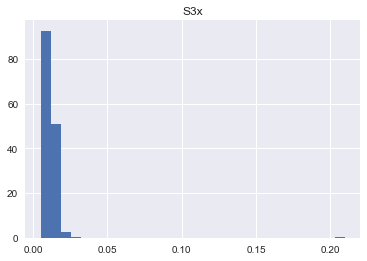

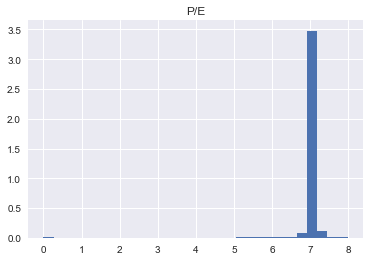

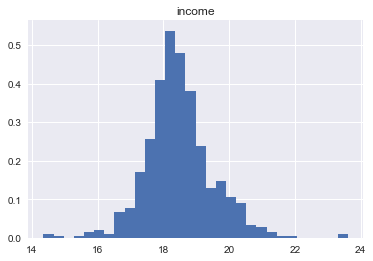

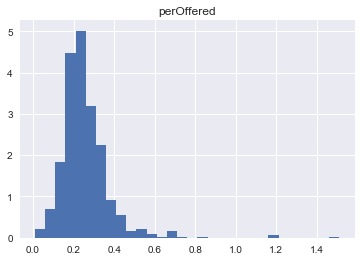

In [10]:
transform=['C1','C6x','C7','T1','T2','T4x','T3x','T5x','S1x','S2x','S3x','P/E','income','perOffered'] #Variables that need to be normalized
norm_plot=ipo_data[transform]

# plotting our hists
for i in range(len(norm_plot.columns)):
        plt.hist(np.log(norm_plot.iloc[:,i]+1),bins=30,normed=True)
        plt.title('%s' % norm_plot.columns[i])
        plt.show()

As we can see, the **log** transformation has worked quite well for some of our variables. *C1*, *C7*,*income*,'*T1* and*T2* and *perOffered* look to be much more normally distributed, though the last one has some outlier issues. The remainder still need some work, their issue being a high percentage of a zero value. Trying the **Square Root** function we get the following results:

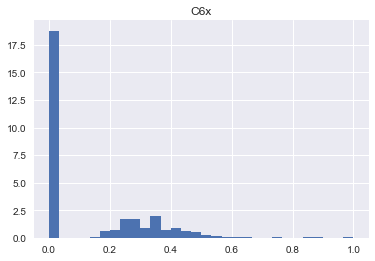

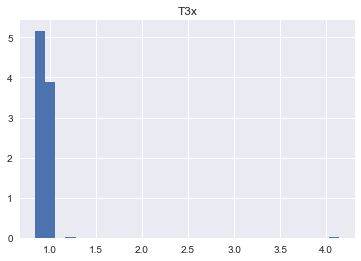

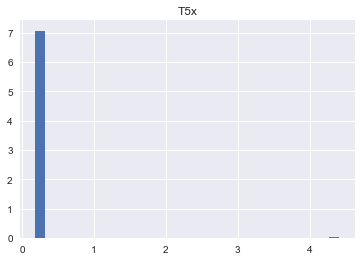

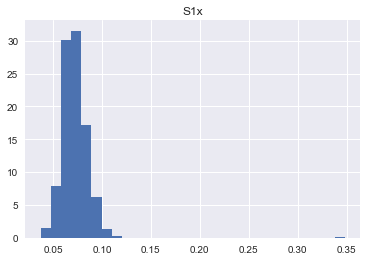

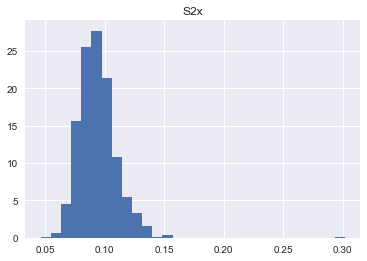

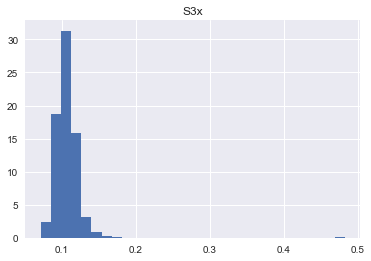

In [11]:
transform=['C6x','T3x','T5x','S1x','S2x','S3x'] #Variables that need to be normalized
norm_plot=ipo_data[transform]

# plotting our hists
for i in range(len(norm_plot.columns)):
        plt.hist(norm_plot.iloc[:,i]**0.5,bins=30,normed=True)
        plt.title('%s' % norm_plot.columns[i])
        plt.show()

It was decided to square root the remaining variables. The justification was that the square root appeared to make more normal the *S1x-S3x* variables. As for *C6x*, *T3x* and *T5x* variables, clearly standard transformations will not work on these and will require further research into methods such as binning. *C6x* was binned on a binary level, while *T3x* and *T5x* were binned on a quartile level. 

The code below implements the transformations for each of the variables discussed in this section.

In [12]:
# Converting C6x and C2 to correct type
ipo_data.C6x = ipo_data.C6x.astype(float)

ipo_data.C2 = ipo_data.C2.astype(int)

# Implementing normalisation techniques for our variables that need to be sqrt or log 
sqrt_transform=['S1x','S2x','S3x'] #Variables that need to be square rooted
ipo_data[sqrt_transform]=ipo_data[sqrt_transform]**0.5 #square rooting variable

log_transform=['C1','C7','income','T1','T2','T4x','perOffered'] #Variables to be log transformed
ipo_data[log_transform]=np.log(ipo_data[log_transform])#log transformation


# Binning the remaining variables

# binning on quartile level
ipo_data['T5xbin'] = 0
# ipo_data.loc[(ipo_data['T5x'] >= 0.080692),'T5xbin'] = 1
ipo_data.loc[(ipo_data['T5x'] >= 0) & (ipo_data['T5x'] < .0474),'T5xbin'] = 1
ipo_data.loc[(ipo_data['T5x'] >= .047401) & (ipo_data['T5x'] < .0519), 'T5xbin'] = 2
ipo_data.loc[(ipo_data['T5x'] >= .051901) & (ipo_data['T5x'] < .05647), 'T5xbin'] = 3
ipo_data.loc[ipo_data[ 'T5x'] >= .0564701,'T5xbin'] = 4


# binning on binary level
ipo_data['C6xbin'] = 0
ipo_data.loc[(ipo_data['C6x'] > 0),'C6xbin'] = 1

# binning on quartile level
ipo_data['T3xbin'] = 0
ipo_data.loc[(ipo_data['T3x'] >= 0.703925) & (ipo_data['T3x'] < 0.883578),'T3xbin'] = 1
ipo_data.loc[(ipo_data['T3x'] >= .883578) & (ipo_data['T3x'] < 0.897133), 'T3xbin'] = 2
ipo_data.loc[(ipo_data['T3x'] >= .897133) & (ipo_data['T3x'] < 0.909732), 'T3xbin'] = 3
ipo_data.loc[ipo_data[ 'T3x'] >= 0.909732,'T3xbin'] = 4

print(ipo_data.dtypes) # checking the types
ipo_data.describe()

I1                object
I2                object
I3                object
P(IPO)           float64
P(H)             float64
P(L)             float64
P(1Day)          float64
C1               float64
C2                 int32
C3               float64
C4               float64
C5               float64
C6               float64
C7               float64
T1               float64
T2               float64
T3               float64
T4               float64
T5               float64
S1               float64
S2               float64
S3               float64
IndDivision       object
Manufacturing      uint8
Other              uint8
Services           uint8
Y1                 int64
Y2                 int64
C3x                int64
C6x              float64
C5x              float64
T3x              float64
T4x              float64
T5x              float64
S1x              float64
S2x              float64
S3x              float64
income           float64
perOffered       float64
P/E              float64


,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T5x,S1x,S2x,S3x,income,perOffered,P/E,T5xbin,C6xbin,T3xbin
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,4.765815,0.863636,1.802750,0.007282,4.935776e+07,1.241519e+07,...,0.080692,0.072485,0.094300,0.107151,18.475189,-1.331631,1159.904779,2.501466,0.373900,2.500000
std,6.031467,6.604398,5.792641,72.042293,0.660942,0.343426,158.308525,0.032775,1.039156e+08,2.501761e+07,...,0.744766,0.015820,0.016951,0.019313,1.025544,0.535426,157.354155,1.118854,0.484193,1.120166
min,3.000000,0.000000,3.000000,0.000000,2.302585,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,...,0.031595,0.037268,0.046394,0.071590,14.349809,-4.603040,0.000000,1.000000,0.000000,1.000000
25%,10.000000,13.000000,11.000000,11.092500,4.442651,1.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,...,0.047413,0.064454,0.083854,0.097826,17.877676,-1.582083,1139.437996,2.000000,0.000000,1.250000
50%,13.500000,15.481190,13.000000,15.000000,4.700480,1.000000,0.085000,0.007282,2.759165e+07,7.500000e+06,...,0.051901,0.071197,0.092735,0.106324,18.397920,-1.327089,1152.913835,2.500000,0.000000,2.500000
75%,17.000000,17.000000,15.000000,21.030001,5.028799,1.000000,0.620000,0.030941,4.938184e+07,1.208721e+07,...,0.056471,0.079108,0.102638,0.113504,18.971544,-1.048525,1177.990302,3.750000,1.000000,3.750000
max,85.000000,135.000000,108.000000,1159.200562,7.643483,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,...,19.500949,0.348485,0.301797,0.483111,23.606053,1.261521,2950.000000,4.000000,1.000000,4.000000


## Correlation analysis
Next, we needed to select the predictor variables with low pair-wise correlation values. In order to do this, we used Spearman's correlation test to determine the statistical dependence between the rankings of pairs of variables.

#### Spearman Test

The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, measures the strength and direction of association between two ranked variables. This test has some assumptions. You need two variables that are either ordinal, interval or ratio. Although you would normally hope to use a Pearson product-moment correlation on interval or ratio data, the Spearman correlation can be used when the assumptions of the Pearson correlation are markedly violated. However, Spearman's correlation determines the strength and direction of the monotonic relationship between your two variables rather than the strength and direction of the linear relationship between your two variables, which is what Pearson's correlation determines. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases.

Below, you can observe the results of our Spearman correlation test.

In [13]:
corr=['C1','C4','C5x','C6x','C7','T4x','S1x','S2x','S3x','T1','T2','P/E','income','perOffered','Y1','Y2','T3xbin','T5xbin','C6xbin']

ipo_data[corr].corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,C1,C4,C5x,C6x,C7,T4x,S1x,S2x,S3x,T1,T2,P/E,income,perOffered,Y1,Y2,T3xbin,T5xbin,C6xbin
C1,1.0,0.091,0.023,-0.064,0.053,0.055,0.033,0.048,-0.026,0.13,0.13,-0.013,-0.047,-0.023,0.07,0.0048,-0.065,0.036,-0.087
C4,0.091,1.0,-0.046,0.093,0.018,0.085,0.0012,0.0041,0.039,0.003,0.019,-0.043,0.0058,0.046,-0.071,0.1,0.051,0.055,0.073
C5x,0.023,-0.046,1.0,0.13,-0.034,0.11,-0.012,-0.071,0.058,0.15,0.17,-0.013,-0.079,-1.0,-0.056,0.087,0.1,0.1,0.1
C6x,-0.064,0.093,0.13,1.0,-0.054,-0.024,-0.081,-0.12,-0.045,0.07,0.055,0.093,0.28,-0.13,-0.77,0.24,-0.035,-0.1,0.96
C7,0.053,0.018,-0.034,-0.054,1.0,0.1,0.087,0.19,-0.07,0.26,0.26,0.21,0.5,0.034,0.003,-0.054,-0.12,-0.12,-0.034
T4x,0.055,0.085,0.11,-0.024,0.1,1.0,0.071,-0.024,-0.091,0.2,0.44,0.016,0.13,-0.11,0.073,-0.01,-0.099,-0.081,-0.053
S1x,0.033,0.0012,-0.012,-0.081,0.087,0.071,1.0,0.13,0.2,-0.0029,-0.0025,0.087,0.052,0.012,0.11,-0.042,0.19,0.15,-0.074
S2x,0.048,0.0041,-0.071,-0.12,0.19,-0.024,0.13,1.0,0.14,0.18,0.14,-0.07,0.16,0.071,0.18,-0.1,0.062,0.14,-0.12
S3x,-0.026,0.039,0.058,-0.045,-0.07,-0.091,0.2,0.14,1.0,-0.22,-0.22,-0.052,-0.12,-0.058,0.062,0.046,0.37,0.37,-0.038
T1,0.13,0.003,0.15,0.07,0.26,0.2,-0.0029,0.18,-0.22,1.0,0.94,0.063,0.45,-0.15,-0.001,-0.061,-0.063,-0.036,0.064


Looking at the spearman table results above, we can see the following correlations:
* **Y1** is correlated with C6x
* **C6xbin** is correlated with C6x (as expected)
* **T1** is correlated with T2

####  ANOVA
Next, for Categorical vs Continuous variables, we used the analysis of variance (ANOVA).  ANOVA provides a statistical test of whether or not the means of several groups are equal.

Below, you can observe the results of our ANOVA correlation tests.

In [14]:
for i in (['C1','C4','C5x','C6x','C7','T4x','S1x','S2x','S3x','T1','T2','P/E','income','perOffered','T3xbin','T5xbin','C6xbin']):
    grps = pd.unique(ipo_data.IndDivision.values)
    d_data = {grp:ipo_data[i][ipo_data.IndDivision == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data['Manufacturing'], d_data['Services'],d_data['Other'])
    print('IndDivision v Variable {} Result {}'.format(i,anova))

IndDivision v Variable C1 Result F_onewayResult(statistic=1.2291287928227876, pvalue=0.29319740074467876)
IndDivision v Variable C4 Result F_onewayResult(statistic=0.09445703899385692, pvalue=0.90987877618878266)
IndDivision v Variable C5x Result F_onewayResult(statistic=2.8660763907644409, pvalue=0.057610740166433624)
IndDivision v Variable C6x Result F_onewayResult(statistic=0.99274646735178562, pvalue=0.37109476248880324)
IndDivision v Variable C7 Result F_onewayResult(statistic=18.280739762082085, pvalue=1.8498976587452155e-08)
IndDivision v Variable T4x Result F_onewayResult(statistic=2.5546027484046632, pvalue=0.07846995191306988)
IndDivision v Variable S1x Result F_onewayResult(statistic=12.472704638909411, pvalue=4.7896557235672212e-06)
IndDivision v Variable S2x Result F_onewayResult(statistic=6.6481303142902588, pvalue=0.0013824810371474232)
IndDivision v Variable S3x Result F_onewayResult(statistic=7.8808579886040295, pvalue=0.00041353035727346348)
IndDivision v Variable T1 

In [15]:
for i in (['C1','C4','C5x','C6x','C7','T4x','S1x','S2x','S3x','T1','T2','P/E','income','perOffered','T3xbin','T5xbin','C6xbin']):
    grps = pd.unique(ipo_data.C3x.values)
    d_data = {grp:ipo_data[i][ipo_data.C3x == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[0], d_data[1])
    print('C3x v Variable {} Result {}'.format(i,anova))

C3x v Variable C1 Result F_onewayResult(statistic=0.016869118764729945, pvalue=0.89669885037377539)
C3x v Variable C4 Result F_onewayResult(statistic=0.051828812317430389, pvalue=0.81997945359286017)
C3x v Variable C5x Result F_onewayResult(statistic=0.43993904174863357, pvalue=0.50737666176621121)
C3x v Variable C6x Result F_onewayResult(statistic=0.2777809314673822, pvalue=0.59833126800572689)
C3x v Variable C7 Result F_onewayResult(statistic=66.157023370276619, pvalue=1.9773736004939616e-15)
C3x v Variable T4x Result F_onewayResult(statistic=1.9098662370353729, pvalue=0.16743191983600036)
C3x v Variable S1x Result F_onewayResult(statistic=2.2886657860316082, pvalue=0.13078651062850891)
C3x v Variable S2x Result F_onewayResult(statistic=1.9536225187235132, pvalue=0.16265281787287086)
C3x v Variable S3x Result F_onewayResult(statistic=1.899603609775945, pvalue=0.16857599858120598)
C3x v Variable T1 Result F_onewayResult(statistic=9.58066283972809, pvalue=0.002047103452549701)
C3x v Va

In [16]:
for i in (['C1','C4','C5x','C6x','C7','T4x','S1x','S2x','S3x','T1','T2','P/E','income','perOffered','T3xbin','T5xbin','C6xbin']):
    grps = pd.unique(ipo_data.C2.values)
    d_data = {grp:ipo_data[i][ipo_data.C2 == grp] for grp in grps}
        #run anova
    anova = stats.f_oneway(d_data[0], d_data[1])
    print('C2 v Variable {} Result {}'.format(i,anova))

C2 v Variable C1 Result F_onewayResult(statistic=0.13384626805174815, pvalue=0.71459074372048748)
C2 v Variable C4 Result F_onewayResult(statistic=1.7792982903896624, pvalue=0.18268209321167389)
C2 v Variable C5x Result F_onewayResult(statistic=1.9774956899204779, pvalue=0.1601112727071019)
C2 v Variable C6x Result F_onewayResult(statistic=2.5454262670268419, pvalue=0.11107867656534126)
C2 v Variable C7 Result F_onewayResult(statistic=24.094910555270477, pvalue=1.1491748175702316e-06)
C2 v Variable T4x Result F_onewayResult(statistic=4.3010438181917046, pvalue=0.038464810938291273)
C2 v Variable S1x Result F_onewayResult(statistic=3.1765618301260647, pvalue=0.075147857558440168)
C2 v Variable S2x Result F_onewayResult(statistic=2.2409261004881733, pvalue=0.13486445958712642)
C2 v Variable S3x Result F_onewayResult(statistic=0.71714591426393437, pvalue=0.39737963030256751)
C2 v Variable T1 Result F_onewayResult(statistic=25.217557562864855, pvalue=6.5503940381174214e-07)
C2 v Variable T

Using a P-value threshold of around 0.5, we see the following correlations from our above ANOVA tests:
* **IndDivision** Cluster is correlated with C4
* **C3x** variable is correlated with C1, C4, C6x, and perOffered
* **C2** variable is correlated with C1, and P/E

#### Chi-Squared Test
Finally, we used the Chi Squared Test to determine correlation between categorical vs. categorical variables. This test aims to determine if distributions of categorical variables differ from each another.

Below, you can observe the results of our Chi-Square correlation tests.

In [17]:
from scipy.stats import chi2_contingency
for i in (['C2','IndDivision','C6xbin', 'Y1','Y2','C3x']):
        for i2 in (['C2','T3xbin','T5xbin', 'Y1','Y2','C3x']):
            if i != i2:
                cat_ct = pd.crosstab(ipo_data[i],ipo_data[i2])
                #run chi2 test on crosstab
                chi2, p, dof, expected = chi2_contingency(cat_ct)
                print('{} v {} Chi2 {} p {}'.format(i,i2,chi2,p))
            else:
                'Null'

C2 v T3xbin Chi2 4.527353816257186 p 0.20986332826123275
C2 v T5xbin Chi2 11.08636744941128 p 0.011267904778504208
C2 v Y1 Chi2 2.285998429809462 p 0.13054610936783412
C2 v Y2 Chi2 3.266926328274258 p 0.07068995355610629
C2 v C3x Chi2 0.008379659461998064 p 0.9270631429246794
IndDivision v C2 Chi2 4.088422811414501 p 0.12948225869689736
IndDivision v T3xbin Chi2 9.772898884255321 p 0.1345473059880845
IndDivision v T5xbin Chi2 36.239337785659735 p 2.476537576617048e-06
IndDivision v Y1 Chi2 5.913871921628509 p 0.051977935860841734
IndDivision v Y2 Chi2 3.0087845893122687 p 0.22215225593228294
IndDivision v C3x Chi2 42.428388360400895 p 6.120579305096653e-10
C6xbin v C2 Chi2 8.010672776444487 p 0.004650245809970422
C6xbin v T3xbin Chi2 5.1673620516459025 p 0.15994434726821985
C6xbin v T5xbin Chi2 10.322055782020016 p 0.01601787946110845
C6xbin v Y1 Chi2 426.09029482952576 p 1.1530389534756817e-94
C6xbin v Y2 Chi2 39.07713769629338 p 4.07386772568667e-10
C6xbin v C3x Chi2 11.8095323711260

Using a P-value threshold of 0.5, we see the following correlations from our above Chi-Square tests:
* **C2** is correlated with C3x
* **Y2** target is correlated with T5xbin

To summarize, below is a full list of all correlated variables within our dataset across the various correlation tests:

* **Y1** target is correlated with C6x
* **Y2** target is correlated with T5xbin
* **C6xbin** is correlated with C6x
* **T1** is correlated with T2
* **IndDivision** Cluster is correlated with C4
* **C3x** variable is correlated with C1, C4, C5x, C6x, and perOffered
* **C2** variable is correlated with C1, C3x, and P/E

With these correlations in mind, we tested various predictor sets in each model, making sure to drop correlated variables, as they may weaken the effect from other variables.

### Outliers
In statistics, an outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution, as we saw in the last section, it caused some weighted tails in certain variables.  Outlier points can therefore indicate faulty data, erroneous procedures, or areas where a certain theory might not be valid.  However, in large samples, a small number of outliers is to be expected (and not due to any anomalous condition). There are methods that can deal with outliers, thankfully. While outliers are expected; extreme illogical data constitute faulty data. A negative return of 786 EPS in the case of NeuroMetrix, Inc. indicate faulty data. Through careful examination we can separate faulty data from outliers.

To deal with outliers, we plan on using the following methods for various data versions:
 1. Calculating the points that are greater than or less than 3 standard deviations
   away from the mean and setting any values outside this range to the upper / lower bound, respectively.
 2. Calculating the points that are greater than or less than 3 standard deviations
   away from the mean and setting any values outside this range to the mean
 3. Calculating the Interquartile Range and finding values outside the limits Q1-IQR*1.5 and Q3+IQR*1.5 
   and setting to be the mean
 4. Calculating the Interquartile Range and finding values outside the limits Q1-IQR*1.5 and Q3+IQR*1.5 
    and setting to be the Q1 or Q3, respectively.

[Outliers Function](https://github.com/ConorFeeney/IS540-Code/blob/master/outliers.py) 
 
The method that we deemed most appropriate based on our analysis was **method 4**.

In [18]:
for i in range(len(ipo_data.columns)): 
    if ipo_data.iloc[:,i].dtype == float:
        outlier(ipo_data.iloc[:,i],4)             
ipo_data.describe()

C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\outliers.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_lower] = lq
C:\Users\conor\Documents\Fairfield College\IS540 Data Mining\Competitions\IS540-Code\outliers.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[outlier_upper] = uq


,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T5x,S1x,S2x,S3x,income,perOffered,P/E,T5xbin,C6xbin,T3xbin
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.393385,14.984123,12.976555,15.830480,4.743446,0.863636,0.033282,0.008335,3.385426e+07,8.428510e+06,...,0.052022,0.071718,0.093338,0.105956,18.448895,-1.319803,1157.078540,2.501466,0.373900,2.500000
std,4.417597,3.237911,3.264012,6.491448,0.416143,0.343426,0.934963,0.030617,2.022027e+07,4.249641e+06,...,0.006452,0.010776,0.013465,0.011130,0.821993,0.378915,28.531612,1.118854,0.484193,1.120166
min,3.000000,7.000000,5.000000,0.000000,3.583519,0.000000,-2.580000,-0.067296,3.693227e+06,5.250000e+05,...,0.034592,0.043885,0.059626,0.074628,16.300417,-2.374177,1083.333333,1.000000,0.000000,1.000000
25%,10.000000,13.000000,11.000000,11.092500,4.442651,1.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,...,0.047418,0.064460,0.083854,0.097833,17.877676,-1.581816,1139.481094,2.000000,0.000000,1.250000
50%,13.500000,15.481190,13.000000,15.000000,4.700480,1.000000,0.085000,0.007282,2.759165e+07,7.500000e+06,...,0.051901,0.071197,0.092735,0.106324,18.397920,-1.327089,1152.913835,2.500000,0.000000,2.500000
75%,17.000000,17.000000,15.000000,21.030001,5.027569,1.000000,0.620000,0.030941,4.937582e+07,1.206541e+07,...,0.056467,0.079104,0.102613,0.113477,18.971219,-1.048871,1177.889278,3.750000,1.000000,3.750000
max,27.000000,23.000000,21.000000,35.919998,5.902633,1.000000,2.500000,0.092896,9.491289e+07,2.250000e+07,...,0.069380,0.099527,0.130732,0.136902,20.595432,-0.287682,1235.714286,4.000000,1.000000,4.000000


### Standardization
Feature scaling is a method used to standardize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data pre-processing step. Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Bearing all this mind, we felt that this could only help improve our model accuracy.

To standardize, we developed code for three different methods:
 1. Min/Max scaling
 2. Decimal Scaling
 3. Zscore standardization
 
 
[Standardising Function](https://github.com/ConorFeeney/IS540-Code/blob/master/Standardising.py) 

Our standarisation method that we selected was **method 3**.

In [19]:
for i in range(len(ipo_data.columns)):     
    if ipo_data.iloc[:,i].dtype == float:   
        ipo_data.iloc[:,i]=standard(ipo_data.iloc[:,i],3)
ipo_data.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,...,T5x,S1x,S2x,S3x,income,perOffered,P/E,T5xbin,C6xbin,T3xbin
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,...,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.499892,0.504150,0.503866,0.490857,0.491874,0.863636,0.496505,0.504599,0.471688,0.479721,...,0.498354,0.494786,0.492341,0.498062,0.492786,0.501160,0.491266,2.501466,0.373900,2.500000
std,0.293491,0.289036,0.289342,0.293851,0.283077,0.343426,0.281192,0.294297,0.286638,0.289212,...,0.290541,0.288927,0.290502,0.289857,0.285446,0.287228,0.274811,1.118854,0.484193,1.120166
min,0.009318,0.006835,0.007267,0.007371,0.002657,0.000000,0.002594,0.006751,0.067899,0.031456,...,0.003451,0.004900,0.006144,0.002440,0.004478,0.002696,0.004873,1.000000,0.000000,1.000000
25%,0.221199,0.270011,0.272404,0.232732,0.234897,1.000000,0.201080,0.239369,0.227489,0.210182,...,0.237723,0.250301,0.240588,0.232731,0.243553,0.244631,0.268694,2.000000,0.000000,1.250000
50%,0.509627,0.561004,0.502866,0.449100,0.458883,1.000000,0.522056,0.486282,0.378389,0.413523,...,0.492505,0.480721,0.482117,0.513183,0.475276,0.492329,0.441973,2.500000,0.000000,2.500000
75%,0.792870,0.733222,0.732347,0.788428,0.752616,1.000000,0.734844,0.769845,0.778645,0.803940,...,0.754567,0.753448,0.754523,0.750383,0.737428,0.762701,0.767115,3.750000,1.000000,3.750000
max,0.998965,0.993350,0.993017,0.999015,0.997328,1.000000,0.995834,0.997127,0.998735,0.999536,...,0.996430,0.995069,0.997258,0.997286,0.995491,0.996774,0.997075,4.000000,1.000000,4.000000


### Clustering - K Means
k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean. The algorithm has a loose relationship to the k-nearest neighbor classifier, a popular machine learning technique for classification that is often confused with k-means because of the k in the name. It was decided to use K-means clustering in order to improve the results we would get in the modelling stage. A **4 Cluster** solution was deemed the most efficient.

In [20]:
# Create K-means model and determine euclidian distances for each data point
# Using all predictor variables that are used for targets 
train=['C2','C7','C5x','C6xbin','S1x','S2x','S3x','T1','T3xbin','T4x','T5xbin','income','Other','Services','Manufacturing']
X=ipo_data[train]
kmeans_model = KMeans(n_clusters=4)
distances = kmeans_model.fit_transform(X)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

# adding our clusters to our data set
ipo_data['labels'] = labels
train.append('labels')

### Data Prep Summary
Once we got the raw data, we manually corrected the incorrect *I3* codes and our raw data became updated. Next we aggregated the *I3* codes up into three industry divisions, Manufacturing, Services and Other. Then we created Dummy Variables for this new varibale.

Our next step was replacing missing data and negative or 0 value data with the mean and normalising our data using the square root and log functions as seen in the Normalisation section. After, we conducted our correlation analysis which highlighted correlations. Following this, we dealt with outliers using the interquarilte range times 1.5 plus or minus the upper and lower quartiles to identify values exceeding that value, and replacing with the value of the upper/lower quartile depending. Next we used z score standardisation to standardise our data, before using K-means clustering with 4 clusters.

In the next section we look at simple logistic regression with differing preictors for the two target variables.

## Model Generation
### Y1 Logistic Regression Model
It was decided to keep all non correlated variables for the model creation as we are conducting a predictive analysis. *Y1*'s model was created using the following predictors:

train=['C2','C7','C5x','S1x','S2x','S3x','T1','T3xbin','T4x','T5xbin','income','Other','Services','Manufacturing']

F1 0.6534; AUC 0.6548 
Optimization terminated successfully.
         Current function value: 0.608258
         Iterations 5
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
                           Logit Regression Results                           
Dep. Variable:                     Y1   No. Observations:                  682
Model:                          Logit   Df Residuals:                      668
Method:                           MLE   Df Model:                           13
Date:                Wed, 07 Mar 2018   Pseudo R-squ.:                  0.1220
Time:                        14:54:58   Log-Likelihood:                -414.83
converged:                       True   LL-Null:                       -472.49
                                        LLR p-value:                 1.691e-18
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

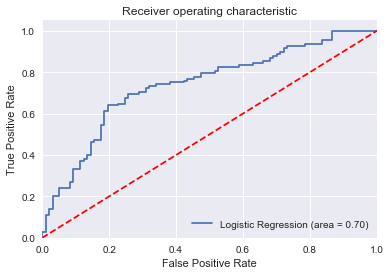

In [21]:
# Creating holder varibales for f1 and AUC
res_hold_f1=[]
res_hold_auc=[]

#loop to calculate f1 and auc scores and present averages after 500 runs
for count in range (1,500):
    
    # Our list of predictors for Y1
    train=['C2','C7','C5x','S1x','S2x','S3x','T1','T3xbin','T4x','T5xbin','income','Other','Services','Manufacturing']
    
    #Model building
    logreg = LogisticRegression()

    X=ipo_data[train]

    y=ipo_data['Y1']
    rfe = RFE(logreg, 18)
    rfe = rfe.fit(X,y)

    logit_model=sm.Logit(ipo_data['Y1'],ipo_data[train])


    X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3)

    logreg = LogisticRegression()
    logreg.fit(X1_train, y1_train)
    y1_pred = logreg.predict(X1_test)

    kfold = model_selection.KFold(n_splits=5, random_state=7)
    modelCV = LogisticRegression()
    scoring = 'accuracy'
    results = model_selection.cross_val_score(modelCV, X1_train, y1_train, cv=kfold, scoring=scoring)
    logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
    #confusion_matrix = confusion_matrix(y_test, y_pred)
    res_hold_f1.append(precision_recall_fscore_support(y1_test, y1_pred, average='weighted')[2])
    res_hold_auc.append(logit_roc_auc)

print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))
result=logit_model.fit()
confusion_matrix_y1 = confusion_matrix(y1_test, y1_pred)

# Printing results
print(rfe.support_)
print(rfe.ranking_)
print(result.summary())
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1_test, y1_test)))
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

print(confusion_matrix_y1)
print(classification_report(y1_test, y1_pred))

# Calculating our AUC/ROC and showing the graph
logit_roc_auc = roc_auc_score(y1_test, logreg.predict(X1_test))
fpr, tpr, thresholds = roc_curve(y1_test, logreg.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

As we can see, there is a lot of output here. The first bit of output is the average F1 and AUC scores ove 500 runs. As we can see, we get scores of around 0.65 for both. Finally we print out the results from the last run of the model generation.

The next bit of output relates to Recursive Feature Elimination (RFE) and this is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features. As we can see all of our selected variables come back with "True".

Next we have some statistical output that relates to our model. We see the log Likelihood, and r-squared valus. Beneath these we see our table containing the value of our coefficients in the "coeff" column. As we are attempting to predict, as opposed to explain, it was decided to keep all variables in the model. 

After this, predicting the test set results and calculating the accuracy is carried out and we obtain a value of 0.70. Following, we utilise cross validation. Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model. The score we receive for this is 0.652, idicating that the average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well. Before we move onto the F1 score and AUC we generate a confusion matrix and observe 63+80 correct predictions and 34+28 in incorrect predictions.

Before we look at the F1 score here are some pointers to remember:
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
* The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
For the Y1 target variable we had an F1 score of 0.70.

Finally we observe the ROC or AUC. The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). 

In the next block of code, we create a model for the *Y2* target variable. However, due to the in-balance in the outcomes of *Y2*, where around 70% of the values are "1", it was decided to reduce the number of records in the data set, specifically reducing those with the value 1. This was done to provide a closer to 50/50 split in the data so that the model would not become overly biased towards predicting "1" for our test set.

*Y2*'s model was created using the following predictors:

train=['C2','C7','C5x','S1x','S2x','S3x','T1','T3xbin','C6xbin','T4x','income','Other','Services','Manufacturing']

F1 0.6166; AUC 0.6110 
Optimization terminated successfully.
         Current function value: 0.556112
         Iterations 6
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
                           Logit Regression Results                           
Dep. Variable:                     Y2   No. Observations:                  682
Model:                          Logit   Df Residuals:                      668
Method:                           MLE   Df Model:                           13
Date:                Wed, 07 Mar 2018   Pseudo R-squ.:                 0.07890
Time:                        14:55:24   Log-Likelihood:                -379.27
converged:                       True   LL-Null:                       -411.75
                                        LLR p-value:                 6.670e-09
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

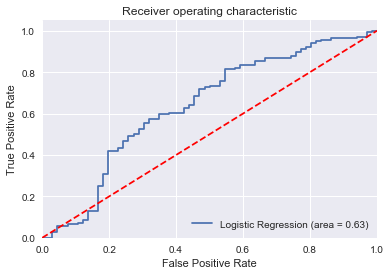

In [22]:
# implementing oversampling as our sample due to in balance between y2=1 and y2=0

# holder variables for our f1 and auc scores
res_hold_f1=[]
res_hold_auc=[]

for count in range (1,500):
    train=['C2','C7','C5x','S1x','S2x','S3x','T1','T3xbin','C6xbin','T4x','income','Other','Services','Manufacturing']
    
    # Model fitting
    logreg = LogisticRegression()

    X=ipo_data[train]

    y=ipo_data['Y2']
    rfe = RFE(logreg, 18)
    rfe = rfe.fit(X,y)

    logit_model=sm.Logit(ipo_data['Y2'],ipo_data[train])

    # Splitting data into testing and training
    X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3)
    
    # Oversampling our training set to account for y2=1 and y2=0 difference
    oversample = pd.concat([X2_train,y2_train],axis=1)
    max_size = oversample['Y2'].value_counts().max()

    lst = [oversample]
    for class_index, group in oversample.groupby('Y2'):
        lst.append(group.sample(max_size-len(group), replace=True))
    X2_train = pd.concat(lst)
    y2_train=pd.DataFrame.copy(X2_train['Y2'])
    del X2_train['Y2']
    

    logreg = LogisticRegression()
    logreg.fit(X2_train, y2_train)
    y2_pred = logreg.predict(X2_test)

    kfold = model_selection.KFold(n_splits=5, random_state=7)
    modelCV = LogisticRegression()
    scoring = 'accuracy'
    
    
    results = model_selection.cross_val_score(modelCV, X2_train, y2_train, cv=kfold, scoring=scoring)
    logit_roc_auc = roc_auc_score(y2_test, logreg.predict(X2_test))
    
    res_hold_f1.append(precision_recall_fscore_support(y2_test, y2_pred, average='weighted')[2])
    res_hold_auc.append(logit_roc_auc)

print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(res_hold_f1),np.mean(res_hold_auc)))

# printing results and confusion matrixes
confusion_matrix_y2 = confusion_matrix(y2_test, y2_pred)
result=logit_model.fit()
# Printing results
print(rfe.support_)
print(rfe.ranking_)
print(result.summary())
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X2_test, y2_test)))
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

print(confusion_matrix_y2)
print(classification_report(y2_test, y2_pred))

# Calculating our AUC/ROC and showing the graph
logit_roc_auc = roc_auc_score(y2_test, logreg.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y2_test, logreg.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

Over 500 runs, we seem to get a value of 0.61 for both

Notice that for the four variables we use, RFE deems them to be significant. The four variables we have selected are again all statistically significant, and the approach to select these four is identical to the one used in the previous model.

After this, predicting the test set results and calculating the accuracy is carried out and we obtain a value of 0.6. Following, we utilise cross validation. The score we receive for this is 0.533, idicating that the average accuracy remains close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well. Before we move onto the F1 score and AUC we generate a confusion matrix and observe 46+77 correct predictions and 62+20 in incorrect predictions.

For the Y2 target variable we had an F1 score of 0.61.

Finally we oberseve the ROC or AUC.  

### Conclusion 
We began our recoding of the *I3* variable and successfully recoded it into its sector level. Then we aggregated to SEC industry division level and created the three groups *Manufacturing*, *Services* and *Other*. We have dealt with missing data, both the official NaN and more hidden ones like negative values in the number of words variables. This was done by replacing the missing values with the mean (except in the case of the dummy variable *C2* as discussed earlier), and created addition target, control and potentially useful variables. After this we began our data preperation for modelling.

Initially we began wih our correlation analysis between variables. Next we normalised our continuous varaibles using the **log** and **square root** transformations to a acceptable degree success for our base model. In our Outliers section we showed how we used the method 4 which uses the IQR to deal with outliers, before we used z score standardisation to standarise the data. Finally we used K means cluster (4 clusters), before we ran some test models.   

Finally we generated models for *Y1* and *Y2* respectively. We held a discussion of the results as well as a results discussion to our accuracy measures with their respective accuracy scores using the 2 different set of predictors for *Y1* and *Y2* respectively.


### Workload Breakdown
In terms of team work and fair sharing of the load, the team is working quite well. We meet at least once a week to give progress reports along with regular updates via email, calls and texts. We critique each other, and help each other when one or more is struggling.

Please see below a brief breakdown of the work carried out by our team thus far, with guidelines for future steps:
#### Completed Tasks
* Tim: Began code for normalisation, Coded outlier method 3 + 4, z score standardising, read in data and completed initial analysis, recoded days variable, tried and tested new variables in the model
* Danielle: Coded outlier method 1+2, decimal scaling standardising, manually imputed I3 column in raw data, created code for target and control variables, completed correlation analysis
* Conor: Tidied outlier code into function, coded min max standardisation, coded loops to test for best model methods and coded logistic regression model

This report was written as a team. Danielle wrote the initial first draft, with particular emphasis on her tasks. Tim re-drafted Danielles report and added information to his tasks, Conor completed final draft and added information to his completed tasks.



In [23]:
# Exporting our data set

#x.to_csv('Model 28_02_18.csv')
ipo_data.I2=ipo_data.I2.str.replace(',', '')

ipo_data.head(5)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,S1x,S2x,S3x,income,perOffered,P/E,T5xbin,C6xbin,T3xbin,labels
0,RA,RAILAMERICA INC /DE,4011,0.641954,0.824184,0.822854,0.374296,0.168441,1,0.612282,...,0.843043,0.986080,0.014543,0.921926,0.863557,0.933754,1,0,1,3
1,G,Genpact LTD,8742,0.554610,0.824184,0.822854,0.556322,0.217686,1,0.566559,...,0.710637,0.295800,0.638008,0.971885,0.119409,0.990214,2,0,3,2
2,HURN,Huron Consulting Group Inc.,8742,0.641954,0.623142,0.623070,0.681842,0.754792,1,0.426483,...,0.067900,0.044126,0.079717,0.350376,0.643068,0.268195,3,0,1,1
3,ICFI,ICF International Inc.,8742,0.376223,0.623142,0.623070,0.290622,0.683059,1,0.579145,...,0.633636,0.182912,0.964300,0.230003,0.785869,0.951910,2,0,3,2
4,SRVY,GREENFIELD ONLINE INC,8742,0.464521,0.501956,0.502866,0.670772,0.324361,1,0.515663,...,0.829386,0.578304,0.626365,0.288287,0.632336,0.768200,2,0,3,2


In [ ]:
ipo_data.to_csv('PreProcessed Data.csv')

## Bibliography
1. Arthurs, Jonathan D. and Busenitz, Lowell W. and Hoskisson, Robert E. and Johnson, Richard, Signaling in New Ventures: The Use and Impact of the Lockup Period at the Time of the Initial Public Offering (2005). Babson College Entrepreneurship Research Conference (BCERC), 2005. Available at SSRN: https://ssrn.com/abstract=1508538